## USB Demodulator

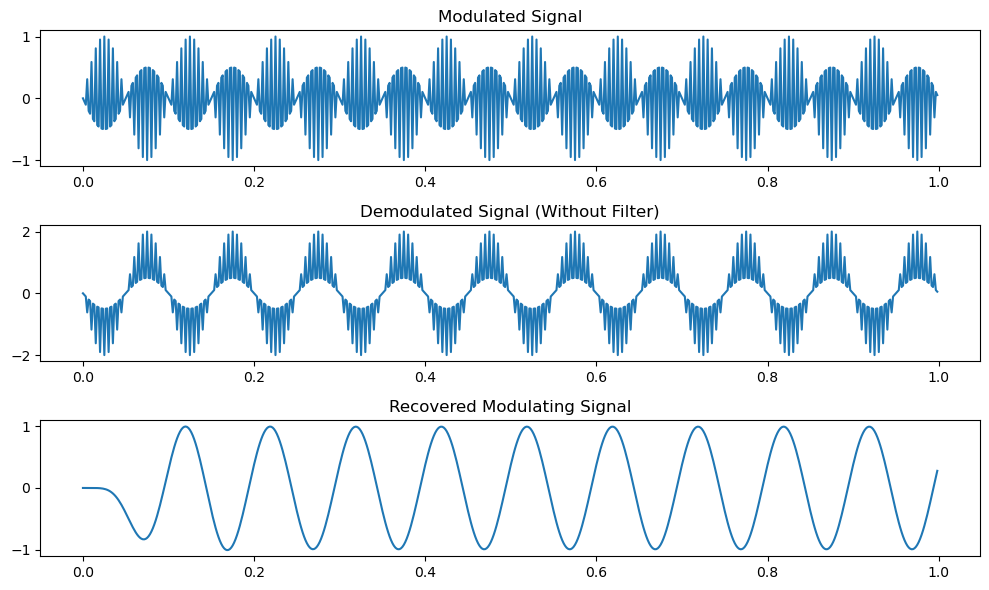

In [68]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# Parameters
carrier_freq = 200  # Carrier frequency in Hz
modulation_freq = 10  # Modulating signal frequency in Hz
duration = 1  # Duration of the signal in seconds
sampling_rate = 3*carrier_freq  # Sampling rate in Hz

# Time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Modulated signal
carrier = np.cos(2 * np.pi * carrier_freq * t)
modulating_signal = np.sin(2 * np.pi * modulation_freq * t)
modulated_signal = carrier * modulating_signal

# Demodulation for USB
demodulated_signal = modulated_signal * (-2 * carrier)

# Apply low-pass filter to recover the modulating signal
cutoff_freq = 15  # Cutoff frequency of the low-pass filter
b, a = scipy.signal.butter(6, cutoff_freq / (0.5 * sampling_rate), btype='low')
recovered_signal = scipy.signal.lfilter(b, a, demodulated_signal)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, modulated_signal)
plt.title('Modulated Signal')

plt.subplot(3, 1, 2)
plt.plot(t, demodulated_signal)
plt.title('Demodulated Signal (Without Filter)')

plt.subplot(3, 1, 3)
plt.plot(t, recovered_signal)
plt.title('Recovered Modulating Signal')

plt.tight_layout()
plt.show()